In [2]:
using Pkg
pkg_folder = "../"
Pkg.activate(pkg_folder)
using BenchmarkTools
import Markdown; Base.showable(::MIME"text/markdown", ::Markdown.MD) = false # to make sth like """?replace"""  works for vscode backend, remember to choose Jupyter kernel
include(pkg_folder*"bnc_initialize.jl")
Threads.nthreads() #

  Activating project at `~/Realizibility_index/bnc_julia`


24

# Catalysis ROP

This is a new chapter of ROP theory, the key is to involve the catalysis process within, First let's using Modified catalysis cycle as an illustration

In [52]:
# Catalysis network
x_sym  = [:E1, :E2, :W, :Ws, :C1, :C2]
q_sym = [:tE1, :tE2, :tW]
K_sym = [:K1,:K2,:k]
    #:E1, :E2, :W, :Ws, :C1, :C2
N = [ 1    0    1   0    -1    0
      0    1    0   1     0   -1
      0    0    0   0     -1   1 ]
# L = [ 1    0    0   0     1   0
#       0    1    0   0     0   1
#       0    0    1   1     1   1]
L = [ 1    0    0   0     1   0
      0    1    0   0     0   1
      0    0    1   1     0   0]
cmodel = Bnc(N=N,L=L,x_sym=x_sym,q_sym=q_sym,K_sym=K_sym)

Bnc{Int8}([1 0 … -1 0; 0 1 … 0 -1; 0 0 … -1 1], [1 0 … 1 0; 0 1 … 0 1; 0 0 … 0 0], 3, 6, 3, Num[E1, E2, W, Ws, C1, C2], Num[tE1, tE2, tW], Num[K1, K2, k], nothing, Vector{Int8}[], Dict{Vector{Int8}, Int64}(), Bool[], Int8[], nothing, Vertex[], Bool[], false, Dict{Vector{Int8}, Tuple{SparseMatrixCSC{Float64, Int64}, Int8}}(), 1, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.3010299956639812, 0.3010299956639812, 0.3010299956639812, 0.0, 0.0, 0.0], false, sparse([1, 2, 3, 3, 1, 2], [1, 2, 3, 4, 5, 6], [1, 1, 1, 1, 1, 1], 3, 6), sparse([1, 2, 3, 3, 1, 2], [1, 2, 3, 4, 5, 6], [1, 1, 1, 1, 1, 1], 3, 6), [[1, 5], [2, 6], [3, 4]], [1, 2, 3, 4], sparse([1, 2, 1, 2, 1, 3, 2, 3], [1, 2, 3, 4, 5, 5, 6, 6], [1, 1, 1, 1, -1, -1, -1, 1], 3, 6), sparse([1, 4, 2, 5, 3, 4, 3, 5, 1, 4, 6, 2, 5, 6], [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 6, 6, 6], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0], 6, 6), [1, 3, 5, 7, 9, 12], [1, 2, 3, 3, 1, 2], [1, 2, 3, 4, 5, 6], [2, 4, 6, 8, 10, 11, 13, 14], [4,

In [4]:
get_vertices_volume!(cmodel)

---------------------Start finding all vertices, it may takes a while.--------------------
Finished, with 16 vertices found and 16 asymptotic vertices.

-------------Start calculating nullity for each vertex, it also takes a while.------------
1.Building Nρ_inv cache in parallel...
2.Calculating nullity for each vertex in parallel...
3.Storing all vertices information...
Done.


LoadError: BoundsError: attempt to access 0-element Vector{Tuple{Float64, Float64}} at index [[1, 3, 5, 6, 9, 13]]

In [79]:
nothing ==true

false

In [5]:
find_all_vertices!(cmodel)
summary(cmodel)

----------Binding Network Summary:-------------
Number of species (n): 6
Number of conserved quantities (d): 3
Number of reactions (r): 3
L matrix: [1 0 0 0 1 0; 0 1 0 0 0 1; 0 0 1 1 1 1]
N matrix: [1 0 1 0 -1 0; 0 1 0 1 0 -1; 0 0 0 0 -1 1]
Direction of binding reactions: forward
Catalysis involved: No
Regimes constructed: Yes
Number of regimes: 16
  - Invertible + Asymptotic: 6
  - Singular +  Asymptotic: 10
  - Invertible +  Non-Asymptotic: 0
  - Singular +  Non-Asymptotic: 0
-----------------------------------------------


In [53]:
grh = SISO_graph(cmodel, :tE1)

---------------------Start finding all vertices, it may takes a while.--------------------
Finished, with 8 vertices found and 8 asymptotic vertices.

-------------Start calculating nullity for each vertex, it also takes a while.------------
1.Building Nρ_inv cache in parallel...
2.Calculating nullity for each vertex in parallel...
3.Storing all vertices information...
Done.
----------------Start calculating vertices neighbor graph, It may takes a while.----------------
Done.

-------Start calculating vertices neighbor graph with qK change dir, It may takes a while.------------
Done.



[ Info: sources: [5, 1]
[ Info: sinks: [4, 2]


SISO_graph{Int8}(Bnc{Int8}([1 0 … -1 0; 0 1 … 0 -1; 0 0 … -1 1], [1 0 … 1 0; 0 1 … 0 1; 0 0 … 0 0], 3, 6, 3, Num[E1, E2, W, Ws, C1, C2], Num[tE1, tE2, tW], Num[K1, K2, k], nothing, Vector{Int8}[[1, 2, 3], [1, 2, 4], [1, 6, 3], [1, 6, 4], [5, 2, 3], [5, 2, 4], [5, 6, 3], [5, 6, 4]], Dict{Vector{Int8}, Int64}([5, 2, 4] => 6, [5, 6, 3] => 7, [1, 6, 4] => 4, [5, 6, 4] => 8, [1, 2, 3] => 1, [5, 2, 3] => 5, [1, 2, 4] => 2, [1, 6, 3] => 3), Bool[1, 1, 1, 1, 1, 1, 1, 1], Int8[0, 0, 1, 0, 0, 1, 1, 1], VertexGraph{Int8}(SimpleGraph{Int64}(12, [[2, 3, 5], [1, 4, 6], [1, 4, 7], [2, 3, 8], [1, 6, 7], [2, 5, 8], [3, 5, 8], [4, 6, 7]]), Vector{VertexEdge{Int8}}[[VertexEdge{Int8}(5, 1, sparsevec(Int8[1, 5], Int8[-1, 1], 6), sparsevec(Int8[3, 4], [1.0, -1.0], 6)), VertexEdge{Int8}(2, 3, sparsevec(Int8[3, 4], Int8[-1, 1], 6), sparsevec(Int8[1, 2, 4, 5, 6], [1.0, -1.0, -1.0, 1.0, 1.0], 6)), VertexEdge{Int8}(3, 2, sparsevec(Int8[2, 6], Int8[-1, 1], 6), sparsevec(Int8[1, 2, 3, 4, 6], [1.0, -1.0, 1.0, -1.0,

In [150]:
get_vertex!(cmodel,12)

Vertex{Float64, Int8}(Int8[5, 6, 5], 12, true, sparse([1, 3, 2], [5, 5, 6], [1, 1, 1], 3, 6), [0.0, 0.0, 0.0], sparse([4, 5, 4, 5, 1, 3, 4, 6, 2, 5, 6], [1, 2, 3, 4, 5, 5, 5, 5, 6, 6, 6], [1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1], 6, 6), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], sparse([1, 2, 3, 4, 1, 3, 4, 5, 2, 5], [1, 2, 3, 4, 5, 5, 5, 5, 6, 6], [-1, -1, -1, -1, 1, 1, 1, 1, 1, -1], 5, 6), [0.0, 0.0, 0.0, 0.0, 0.0], 2, sparse(Int64[], Int64[], Float64[], 6, 6), Float64[], sparse([1, 2, 3, 5, 6, 2, 5, 1, 3, 6, 2], [1, 1, 1, 1, 1, 2, 2, 3, 4, 5, 6], [-1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0], 6, 6), [0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [11, 4, 8, 16, 10], 0.0, 0.0)

In [51]:
show_dominant_condition(cmodel,4)

3-element Vector{Equation}:
 log10(tE1) ~ log10(C1)
 log10(tE2) ~ log10(C2)
 log10(tW) ~ log10(W)

In [50]:
show_condition_qK(cmodel,4)

6-element Vector{Num}:
 log10(k) - log10(tE2) + log10(tE1) ~ 0
           (-log10(K2) + log10(tW)) > 0
                                   true
           (log10(tW) - log10(tE1)) > 0
           (log10(tW) - log10(tE2)) > 0
            (log10(tW) - log10(K1)) > 0

In [49]:
get_M!(cmodel,4)

6×6 SparseMatrixCSC{Int64, Int64} with 11 stored entries:
 ⋅  ⋅  ⋅  ⋅   1   ⋅
 ⋅  ⋅  ⋅  ⋅   ⋅   1
 ⋅  ⋅  1  ⋅   ⋅   ⋅
 1  ⋅  1  ⋅  -1   ⋅
 ⋅  1  ⋅  1   ⋅  -1
 ⋅  ⋅  ⋅  ⋅  -1   1

[ Info: Number of polyhedra to calc volume: 4
[ Info: All regimes converged after 600000 samples.
[ Info: Total samples: 600000, Elapsed: 0.23 s


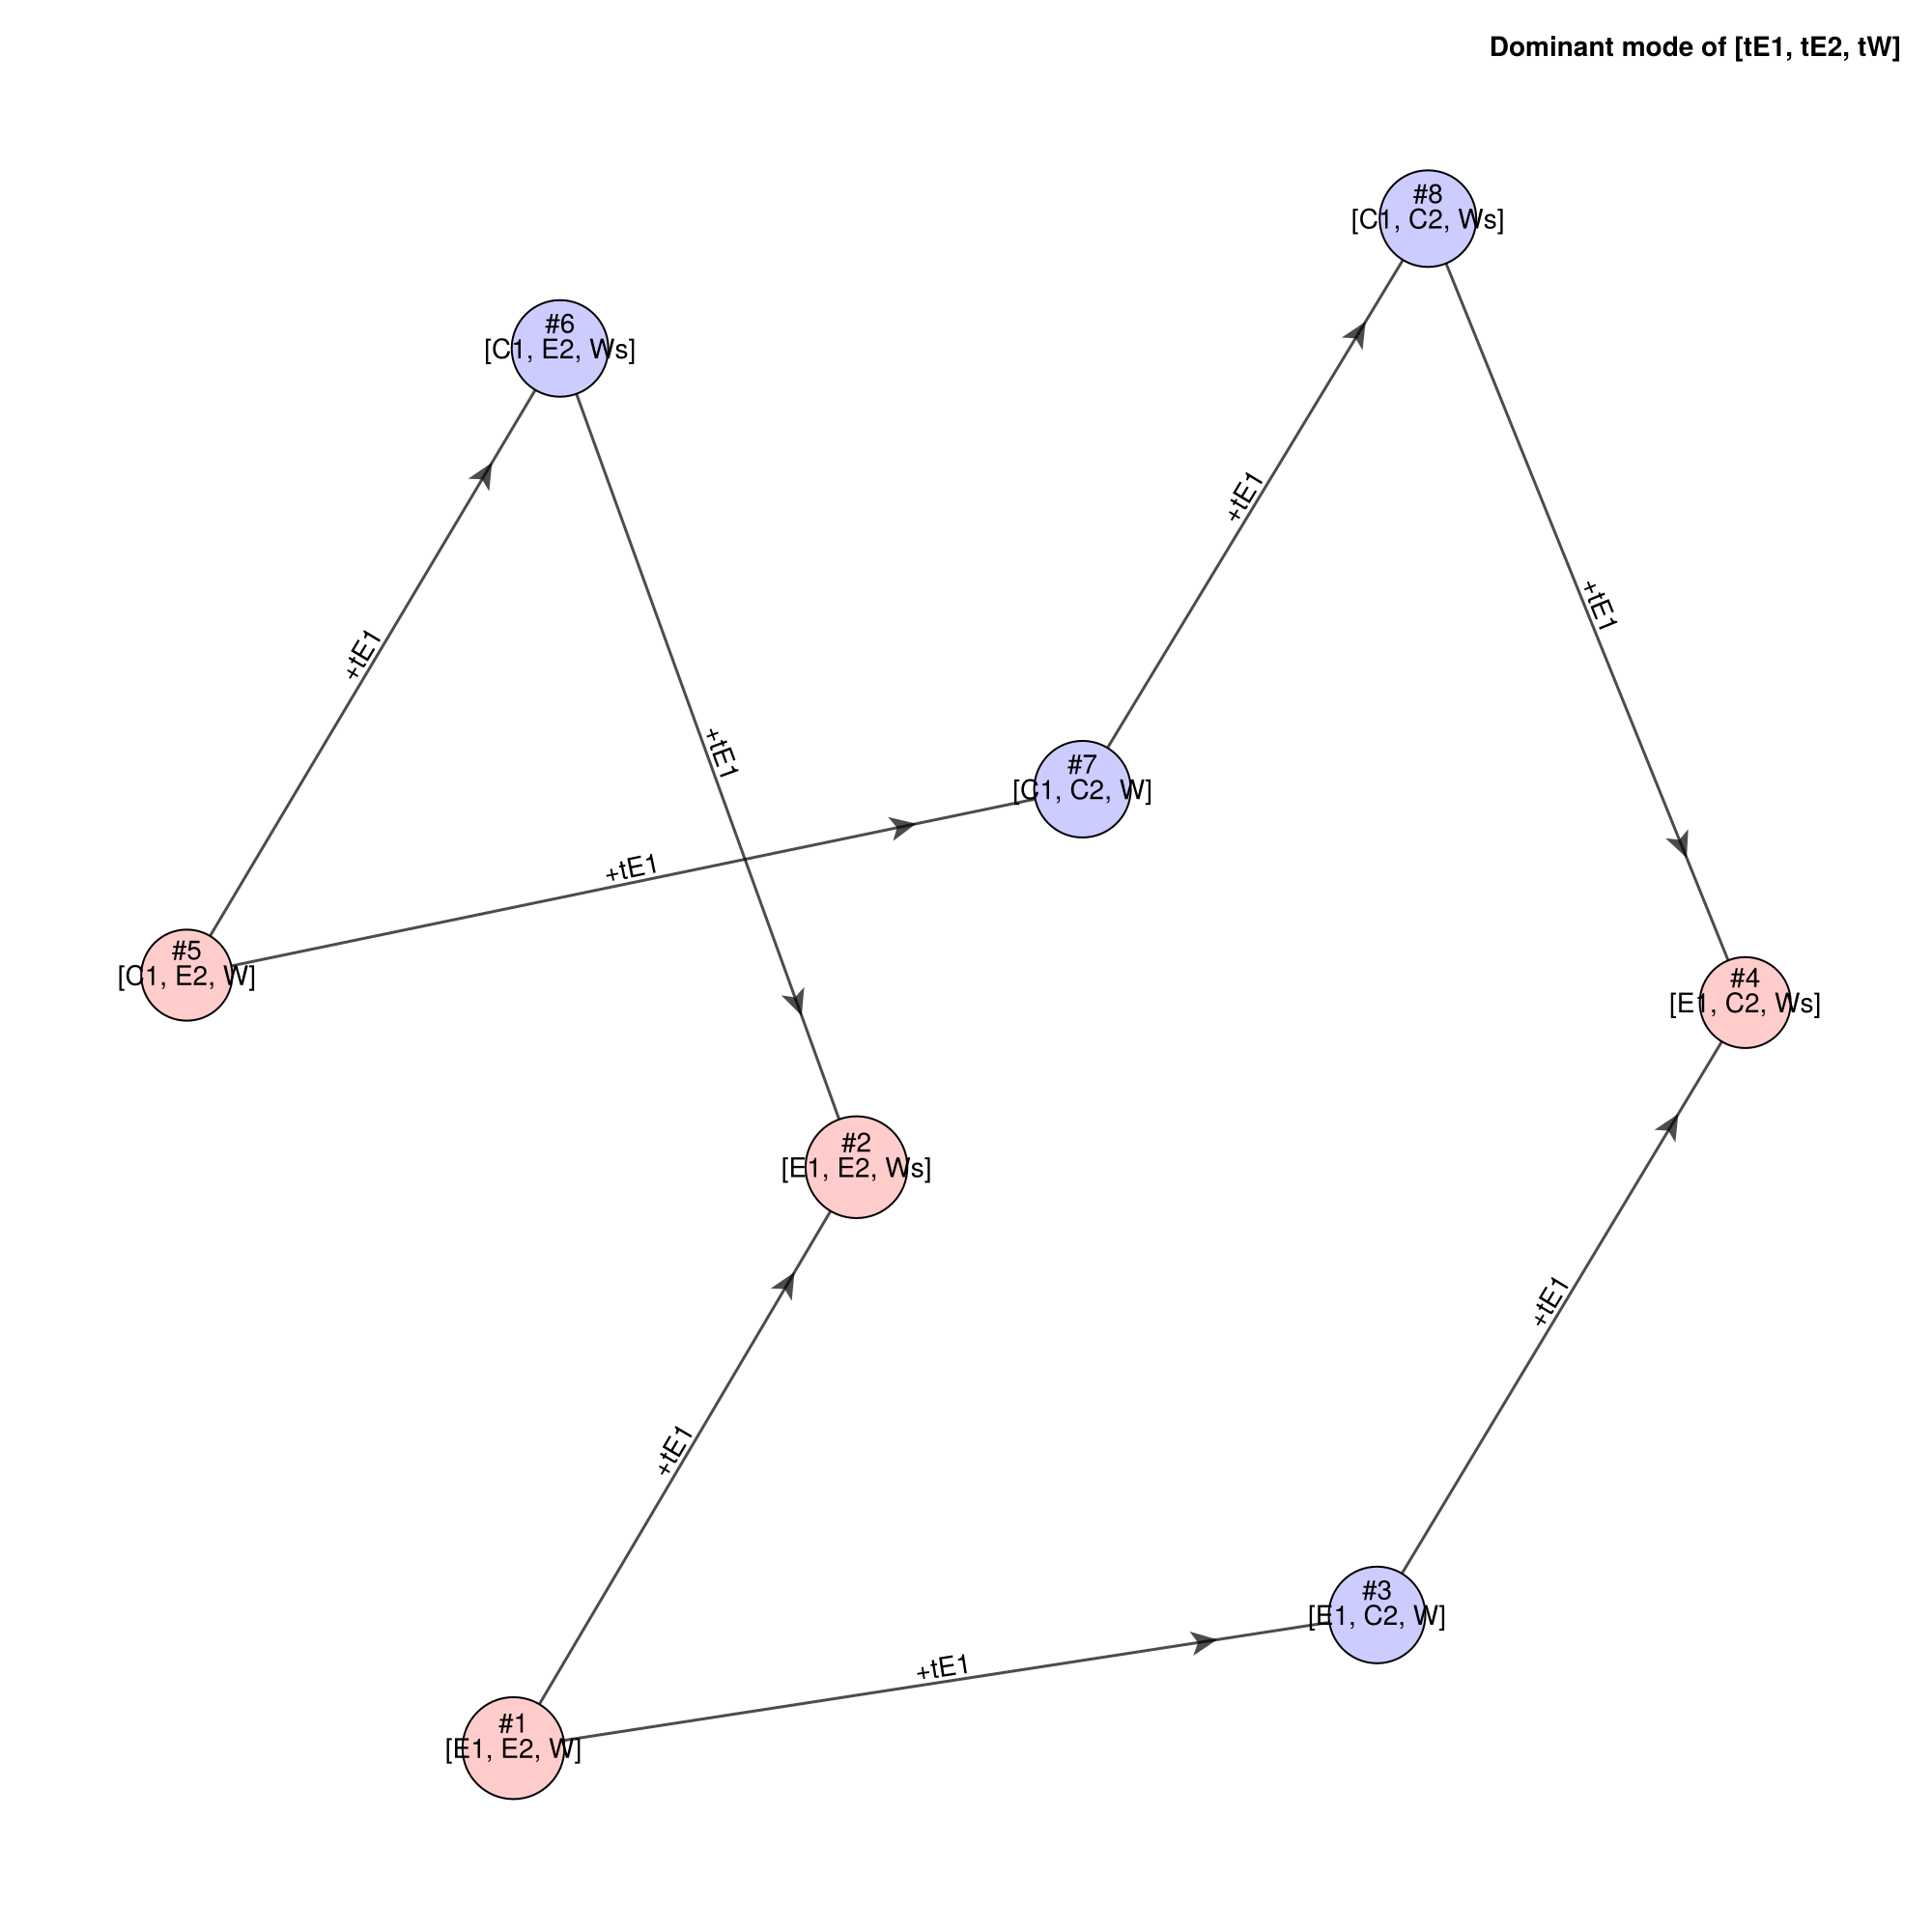

CairoMakie.Screen{IMAGE}


In [54]:
f,ax,p = draw_vertices_neighbor_graph(grh)
add_vertices_idx!(ax,p)
display(f)

In [55]:
summary_path(grh) |> render_path

[ Info: Number of polyhedra to calc volume: 4


Path 1                1 → 2                         	  Volume: 0.3335 ± 0.0015
Path 2                1 → 3 → 4                     	  Volume: 0.1666 ± 0.0008
Path 3                5 → 6 → 2                     	  Volume: 0.167  ± 0.0008
Path 4                5 → 7 → 8 → 4                 	  Volume: 0.333  ± 0.0015


[ Info: All regimes converged after 800000 samples.
[ Info: Total samples: 800000, Elapsed: 1.45 s


In [245]:
a = calc_volume(grh.rgm_polys; contain_overlap=true)

[ Info: Number of polyhedra to calc volume: 8
[ Info: All regimes converged after 2400000 samples.
[ Info: Total samples: 2400000, Elapsed: 1.41 s


8-element Vector{Tuple{Float64, Float64}}:
 (0.06503463952240032, 0.00031867853429053085)
 (0.1687803404583534, 0.0008207673499740175)
 (0.1626153700614533, 0.000808619986901306)
 (0.1041803718034301, 0.0005060410120239445)
 (0.20842853343297021, 0.0010277654427869284)
 (0.10432465712181145, 0.0005063505328949571)
 (0.12413131262189504, 0.0006161836619498197)
 (0.0624736169748264, 0.00030618299082864277)

In [247]:
getindex.(a,1) |> sum

0.9999688419971403

In [154]:
show_condition_qK(cmodel,14;log_space=false)

6-element Vector{Num}:
      tW ~ tE2
      tE2 > K2
          true
         k > 1
  (k*tE1) > K1
 (k*tE1) > tE2

In [32]:
show_condition_qK(grh,3;log_space=false)

4-element Vector{Num}:
      K1 > tW
 tE2 > (k*tW)
 tE2 > (K2*k)
        1 > k

In [33]:
summary_path(grh)

[ Info: Number of polyhedra to calc volume: 8
[ Info: All regimes converged after 2400000 samples.
[ Info: Total samples: 2400000, Elapsed: 0.69 s


8-element Vector{Tuple{Vector{Int64}, Vector{Float64}}}:
 ([1, 2, 6], [0.06460768371376256, 0.000317703249847319])
 ([1, 5], [0.1690940889517885, 0.0008213748096486867])
 ([1, 9], [0.1619553732306416, 0.0008072953119597716])
 ([1, 13], [0.1042482287600946, 0.0005061866164012638])
 ([3, 4, 8, 6], [0.2095701927902412, 0.0010298329393564373])
 ([3, 7, 5], [0.1044610853188948, 0.0005066429210345367])
 ([3, 11, 9], [0.1236594960877712, 0.0006151771244269242])
 ([3, 15, 13], [0.062280700616943165, 0.0003057413326723326])

parameters = [0.0, 2.82842712474619, -1.1715728752538102, 0.0, 0.0]
(crange, cmap_disc) = ((1, 4), PlotUtils.CategoricalColorGradient(ColorSchemes.ColorScheme{Vector{ColorTypes.RGBA{Float64}}, String, String}(ColorTypes.RGBA{Float64}[RGBA(0.5019607843137255, 0.0, 0.5019607843137255, 1.0), RGBA(0.0, 0.16732026143790835, 0.666666666666667, 1.0), RGBA(0.6666666666666665, 0.5986928104575163, 0.0, 1.0), RGBA(1.0, 0.0, 0.0, 1.0)], "", ""), [0.0, 0.25, 0.5, 0.75, 1.0]))


[ Info: Change in logtE1
[ Info: parameters: Pair{Num, Float64}[tE2 => 0.0, tW => 2.82842712474619, K1 => -1.1715728752538102, K2 => 0.0, k => 0.0]
[ Info: Target syms contains: logE1 
[ Info: Target syms contains: logE2 
[ Info: Target syms contains: logW 
[ Info: Target syms contains: logWs 
[ Info: Target syms contains: logC1 
[ Info: Target syms contains: logC2 


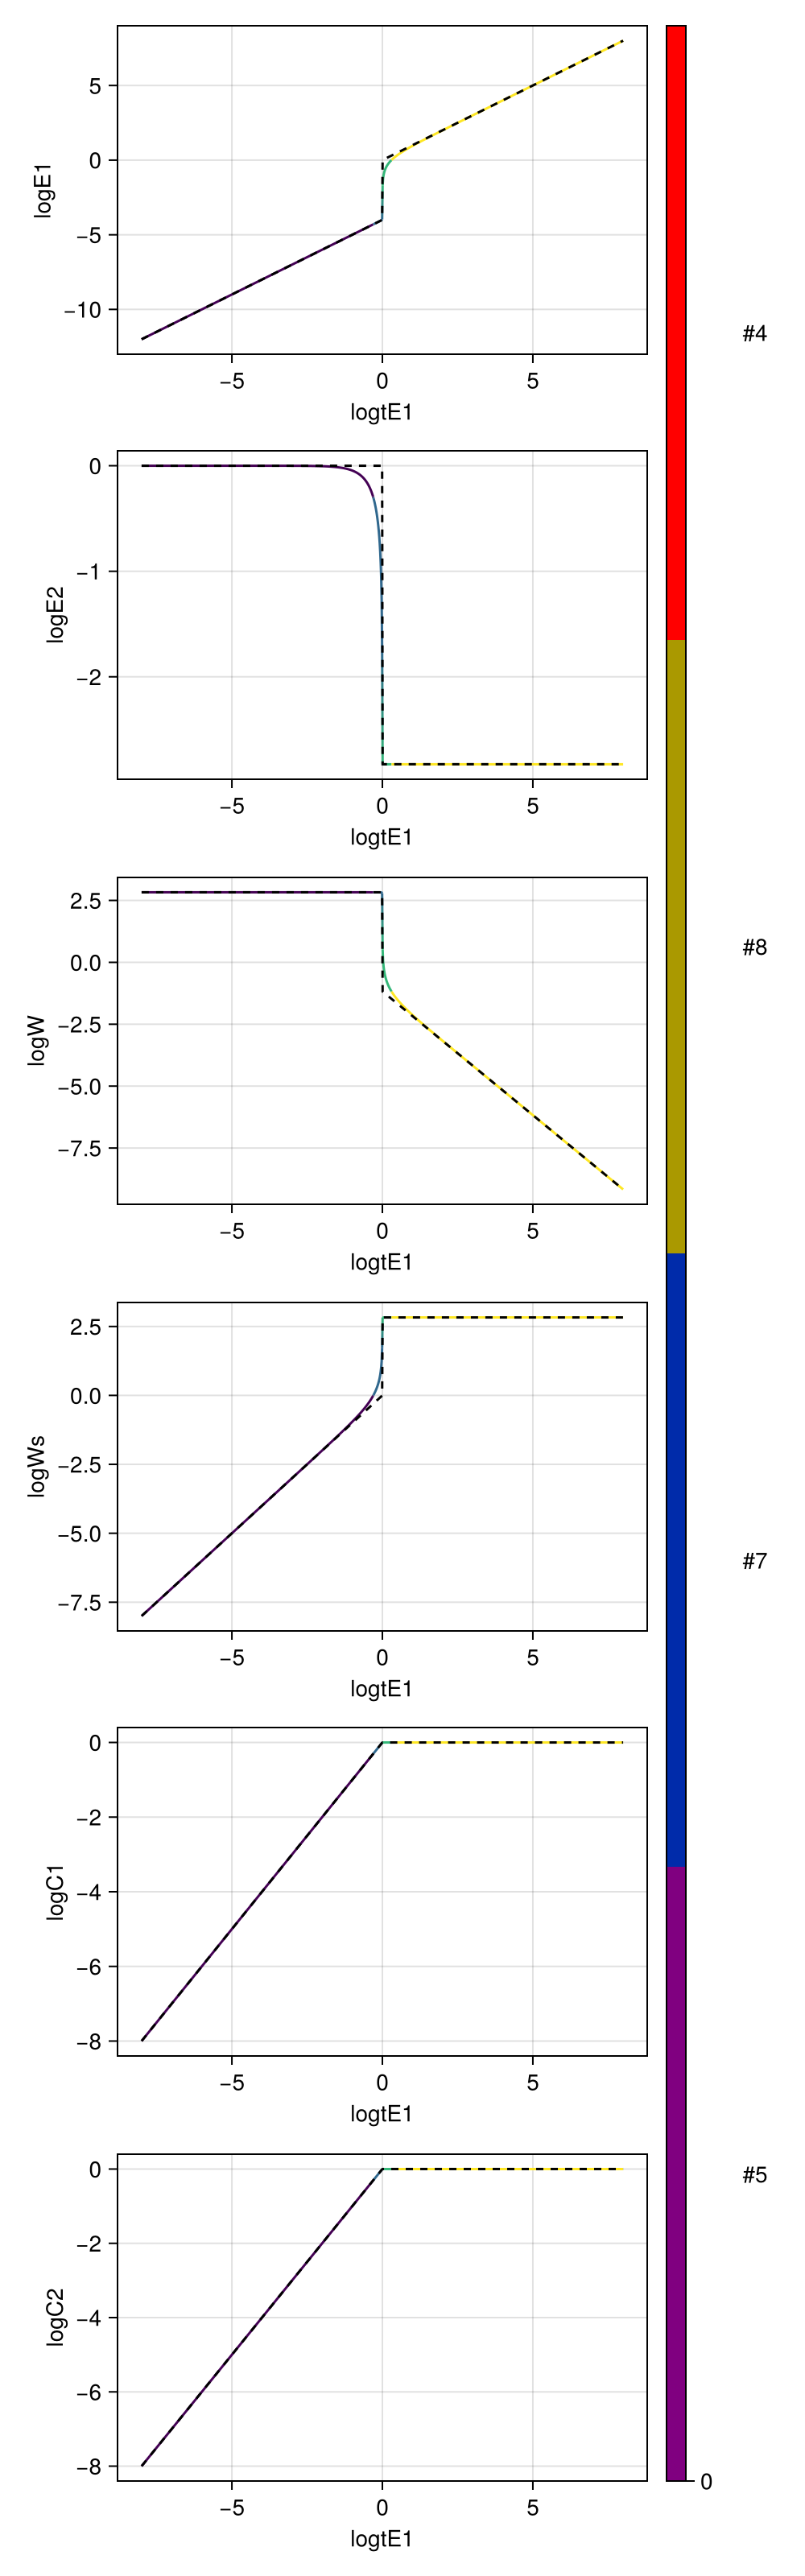

In [66]:
SISO_plot(grh, 4;size = (500,1600), add_archeatype_lines=true,start=-8,stop = 8)
# display(f)

In [272]:
cmodel.q_sym

3-element Vector{Num}:
 tE1
 tE2
  tW

In [250]:
cmodel.x_sym

6-element Vector{Num}:
 E1
 E2
  W
 Ws
 C1
 C2

In [294]:
sum(x->x^(2),[1,2,3])

14

In [298]:
lgx[2]

1000-element Vector{Vector{Float64}}:
 [-6.069555863889816, -2.8290703179387453, -7.588635689794812, -2.8291212357458835, -6.8297644289384385, -5.658191553684628]
 [-6.055490896127919, -2.8290703182945025, -7.60270041752168, -2.8291209953550975, -6.829764188903409, -5.658191313649599]
 [-6.041491197875067, -2.8290703186373505, -7.616699884449685, -2.8291207636874023, -6.829763957578562, -5.658191082324752]
 [-6.027554410104435, -2.829070318967855, -7.6306364492237835, -2.829120540360365, -6.829763734582029, -5.658190859328219]
 [-6.013678276620676, -2.829070319286551, -7.644512367678318, -2.8291203250124437, -6.829763519552804, -5.658190644298994]
 [-5.999860638480231, -2.8290703195939453, -7.658329798415299, -2.829120117301586, -6.829763312149341, -5.658190436895531]
 [-5.986099428783943, -2.829070319890517, -7.672090808010508, -2.8291199169039345, -6.829763112048261, -5.658190236794451]
 [-5.972392667812444, -2.8290703201767196, -7.6857973758769145, -2.8291197235126395, -6.8297629189

In [32]:
function SISO_plot_manual(model, parameters, change_idx; 
        npoints=1000,start=-6, stop=6,cmap=:rainbow, size = (800,1300),draw_idx=nothing,
        add_archeatype_lines::Bool=true,
        regime_asign_asymptotic::Bool=false)

    change_idx = locate_sym([model.q_sym;model.K_sym], change_idx)
    change_sym = "log"*repr([model.q_sym;model.K_sym][change_idx])
    change_S = range(start, stop, npoints)
    start_logqK = copy(parameters)|> x-> insert!(x, change_idx, start)
    end_logqK = copy(parameters)|> x-> insert!(x, change_idx, stop)
    logx = x_traj_with_qK_change(model, start_logqK, end_logqK;input_logspace=true, output_logspace=true, 
                                    tstops = range(0,1,npoints), saveat = range(0,1,npoints))

    # return(logx)
    if add_archeatype_lines
        logx_arch = [qK2x(model, logqK;input_logspace=true, use_vtx=true,output_logspace=true) for logqK in range(start_logqK, end_logqK, npoints)]  # precompute x for archetype lines
    end

    #assign color
    rgm = logx[2] .|> x-> assign_vertex_x(model, x;input_logspace=true,asymptotic=regime_asign_asymptotic) |> x->get_idx(model,x)


    unique_rgm = unique(rgm)
    col_map_dict = Dict(unique_rgm[i]=>i for i in eachindex(unique_rgm))
    crange =(1, length(unique_rgm))
    nlevels = crange[2]-crange[1] + 1
    cmap_disc = cgrad(cmap, nlevels, categorical=true)

    @show crange, cmap_disc
    @info "Change in $(change_sym)"
    @info "parameters: $([i=>j for (i,j) in zip([model.q_sym;model.K_sym] |> x->deleteat!(x,change_idx), parameters)])"
    
    
    draw_idx = [1,5]   #E1 and C1    #isnothing(draw_idx) ? (1:model.n) : draw_idx
    F = Figure(size = size)

    logx = logx[2]
    lgW = getindex.(logx, 3)
    lgC1 = getindex.(logx, 5)
    # lgWt = log10.(exp10.(lgW) .+ exp10.(lgC1))
    lgWt = logx .|> x-> x[[3,5]] |> x->sum(x->exp10(x),x) |> log10
    lgwst = logx .|> x-> x[[4,6]] |> x->sum(x->exp10(x),x) |> log10



    lgW_arch = getindex.(logx_arch,3)
    lgC1_arch = getindex.(logx_arch, 5)
    lgWt_arch = logx_arch .|> x-> x[[3,5]] |> x->sum(x->exp10(x),x) |> log10


    lgWtt = [start_logqK[3]  for i in 1:npoints]
    lgWtt_arch = logx_arch .|> x-> x[[3,4,5,6]] |> x->sum(x->exp10(x),x) |> log10
    # Wtfrac_arch = exp10.(lgWt_arch .- start_logqK[3])
    # Wtfrac = exp10.(lgWt .- start_logqK[3])
    Wtfrac = exp10.(lgWt .- lgWtt)
    Wtfrac_arch = exp10.(lgWt_arch .- lgWtt_arch)



    ax = Axis(F[1,1]; xlabel = change_sym)
    lines!(ax, change_S, lgW; color = map(r->col_map_dict[r], rgm))
    lines!(ax, change_S, lgW_arch; color = :gray, linestyle = :dash,)
    lines!(ax, change_S, lgC1; color = map(r->col_map_dict[r], rgm))
    lines!(ax, change_S, lgC1_arch; color = :brown, linestyle = :dash,)
    
    lines!(ax, change_S, lgWt; color = :red)
    lines!(ax, change_S, lgwst; color = :brown)
    lines!(ax, change_S, lgWt_arch; color = :black, linestyle = :dash,)
    
    

    ax2 = Axis(F[2,1],)
    # lines!(ax2, change_S, lgWt; color = map(r->col_map_dict[r], rgm))
    # lines!(ax2, change_S, lgWt_arch; color = :gray, linestyle = :dash,)
    lines!(ax2, change_S, lgWtt; color = map(r->col_map_dict[r], rgm))
    lines!(ax2, change_S, lgWtt_arch; color = :black, linestyle = :dash,)


    ax3 = Axis(F[3,1])
    lines!(ax3, change_S, Wtfrac; color = map(r->col_map_dict[r], rgm))
    lines!(ax3, change_S, Wtfrac_arch; color = :black, linestyle = :dash,)


    Colorbar(F[:,end+1], colormap = cmap_disc,ticks=[0]) # DO NOT ADD COLORRANGE, 

    # add perm label
    ax = Axis(F[:,end+1])
    hidexdecorations!(ax)
    hideydecorations!(ax)
    hidespines!(ax)
    colsize!(F.layout,3,Fixed(30))
    colsize!(F.layout,2,Fixed(0))

    for i in eachindex(unique_rgm)
        y_pos = (i - 0.5)*(1/length(unique_rgm))
        text!(ax, Point2f(0.5,y_pos); text = "#"*string(unique_rgm[i]), align = (:center, :center), color = :black)
    end
    ylims!(ax, (0,1))
    return F
end

function SISO_plot_manual(SISO_graph::SISO_graph,pth_idx;rand_line=false, rand_ray=false, extend=4, kwargs...)
    parameters = get_one_inner_point(SISO_graph.rgm_polys[pth_idx], rand_line=rand_line, rand_ray=rand_ray, extend=extend)
    @show parameters
    return SISO_plot_manual(SISO_graph.bn, parameters, SISO_graph.change_qK_idx; kwargs...)
end

SISO_plot_manual (generic function with 2 methods)

In [69]:
show_condition_qK(grh,4;log_space=false)

2-element Vector{Num}:
 tW > K1
 tW > K2

In [350]:
log10(0.1)

-1.0

In [351]:
log10(0.9)

-0.045757490560675115

In [ ]:
show_expression_qK

In [68]:
(a,b) = show_expression_path(grh,i,4)
display.(a) 
print(";;;") 
display.(b)

(K2*k*tE1) / tE2

tW

;;;

tE2 / k

1-element Vector{Nothing}:
 nothing

In [60]:
summary_path(grh)

4-element Vector{Tuple{Vector{Int64}, Vector{Float64}}}:
 ([1, 2], [0.33348909911192237, 0.0014610335857971038])
 ([1, 3, 4], [0.1666403507342064, 0.0008165965487911071])
 ([5, 6, 2], [0.166976599119601, 0.0008172550820727849])
 ([5, 7, 8, 4], [0.33299660384167307, 0.0014604936491921185])

([5, 7, 8, 4], [0.33299660384167307, 0.0014604936491921185])

parameters = [0.0, 2.82842712474619, -1.1715728752538102, 0.0, 0.0]
(crange, cmap_disc) = ((1, 4), PlotUtils.CategoricalColorGradient(ColorSchemes.ColorScheme{Vector{ColorTypes.RGBA{Float64}}, String, String}(ColorTypes.RGBA{Float64}[RGBA(0.5019607843137255, 0.0, 0.5019607843137255, 1.0), RGBA(0.0, 0.16732026143790835, 0.666666666666667, 1.0), RGBA(0.6666666666666665, 0.5986928104575163, 0.0, 1.0), RGBA(1.0, 0.0, 0.0, 1.0)], "", ""), [0.0, 0.25, 0.5, 0.75, 1.0]))


[ Info: Change in logtE1
[ Info: parameters: Pair{Num, Float64}[tE2 => 0.0, tW => 2.82842712474619, K1 => -1.1715728752538102, K2 => 0.0, k => 0.0]


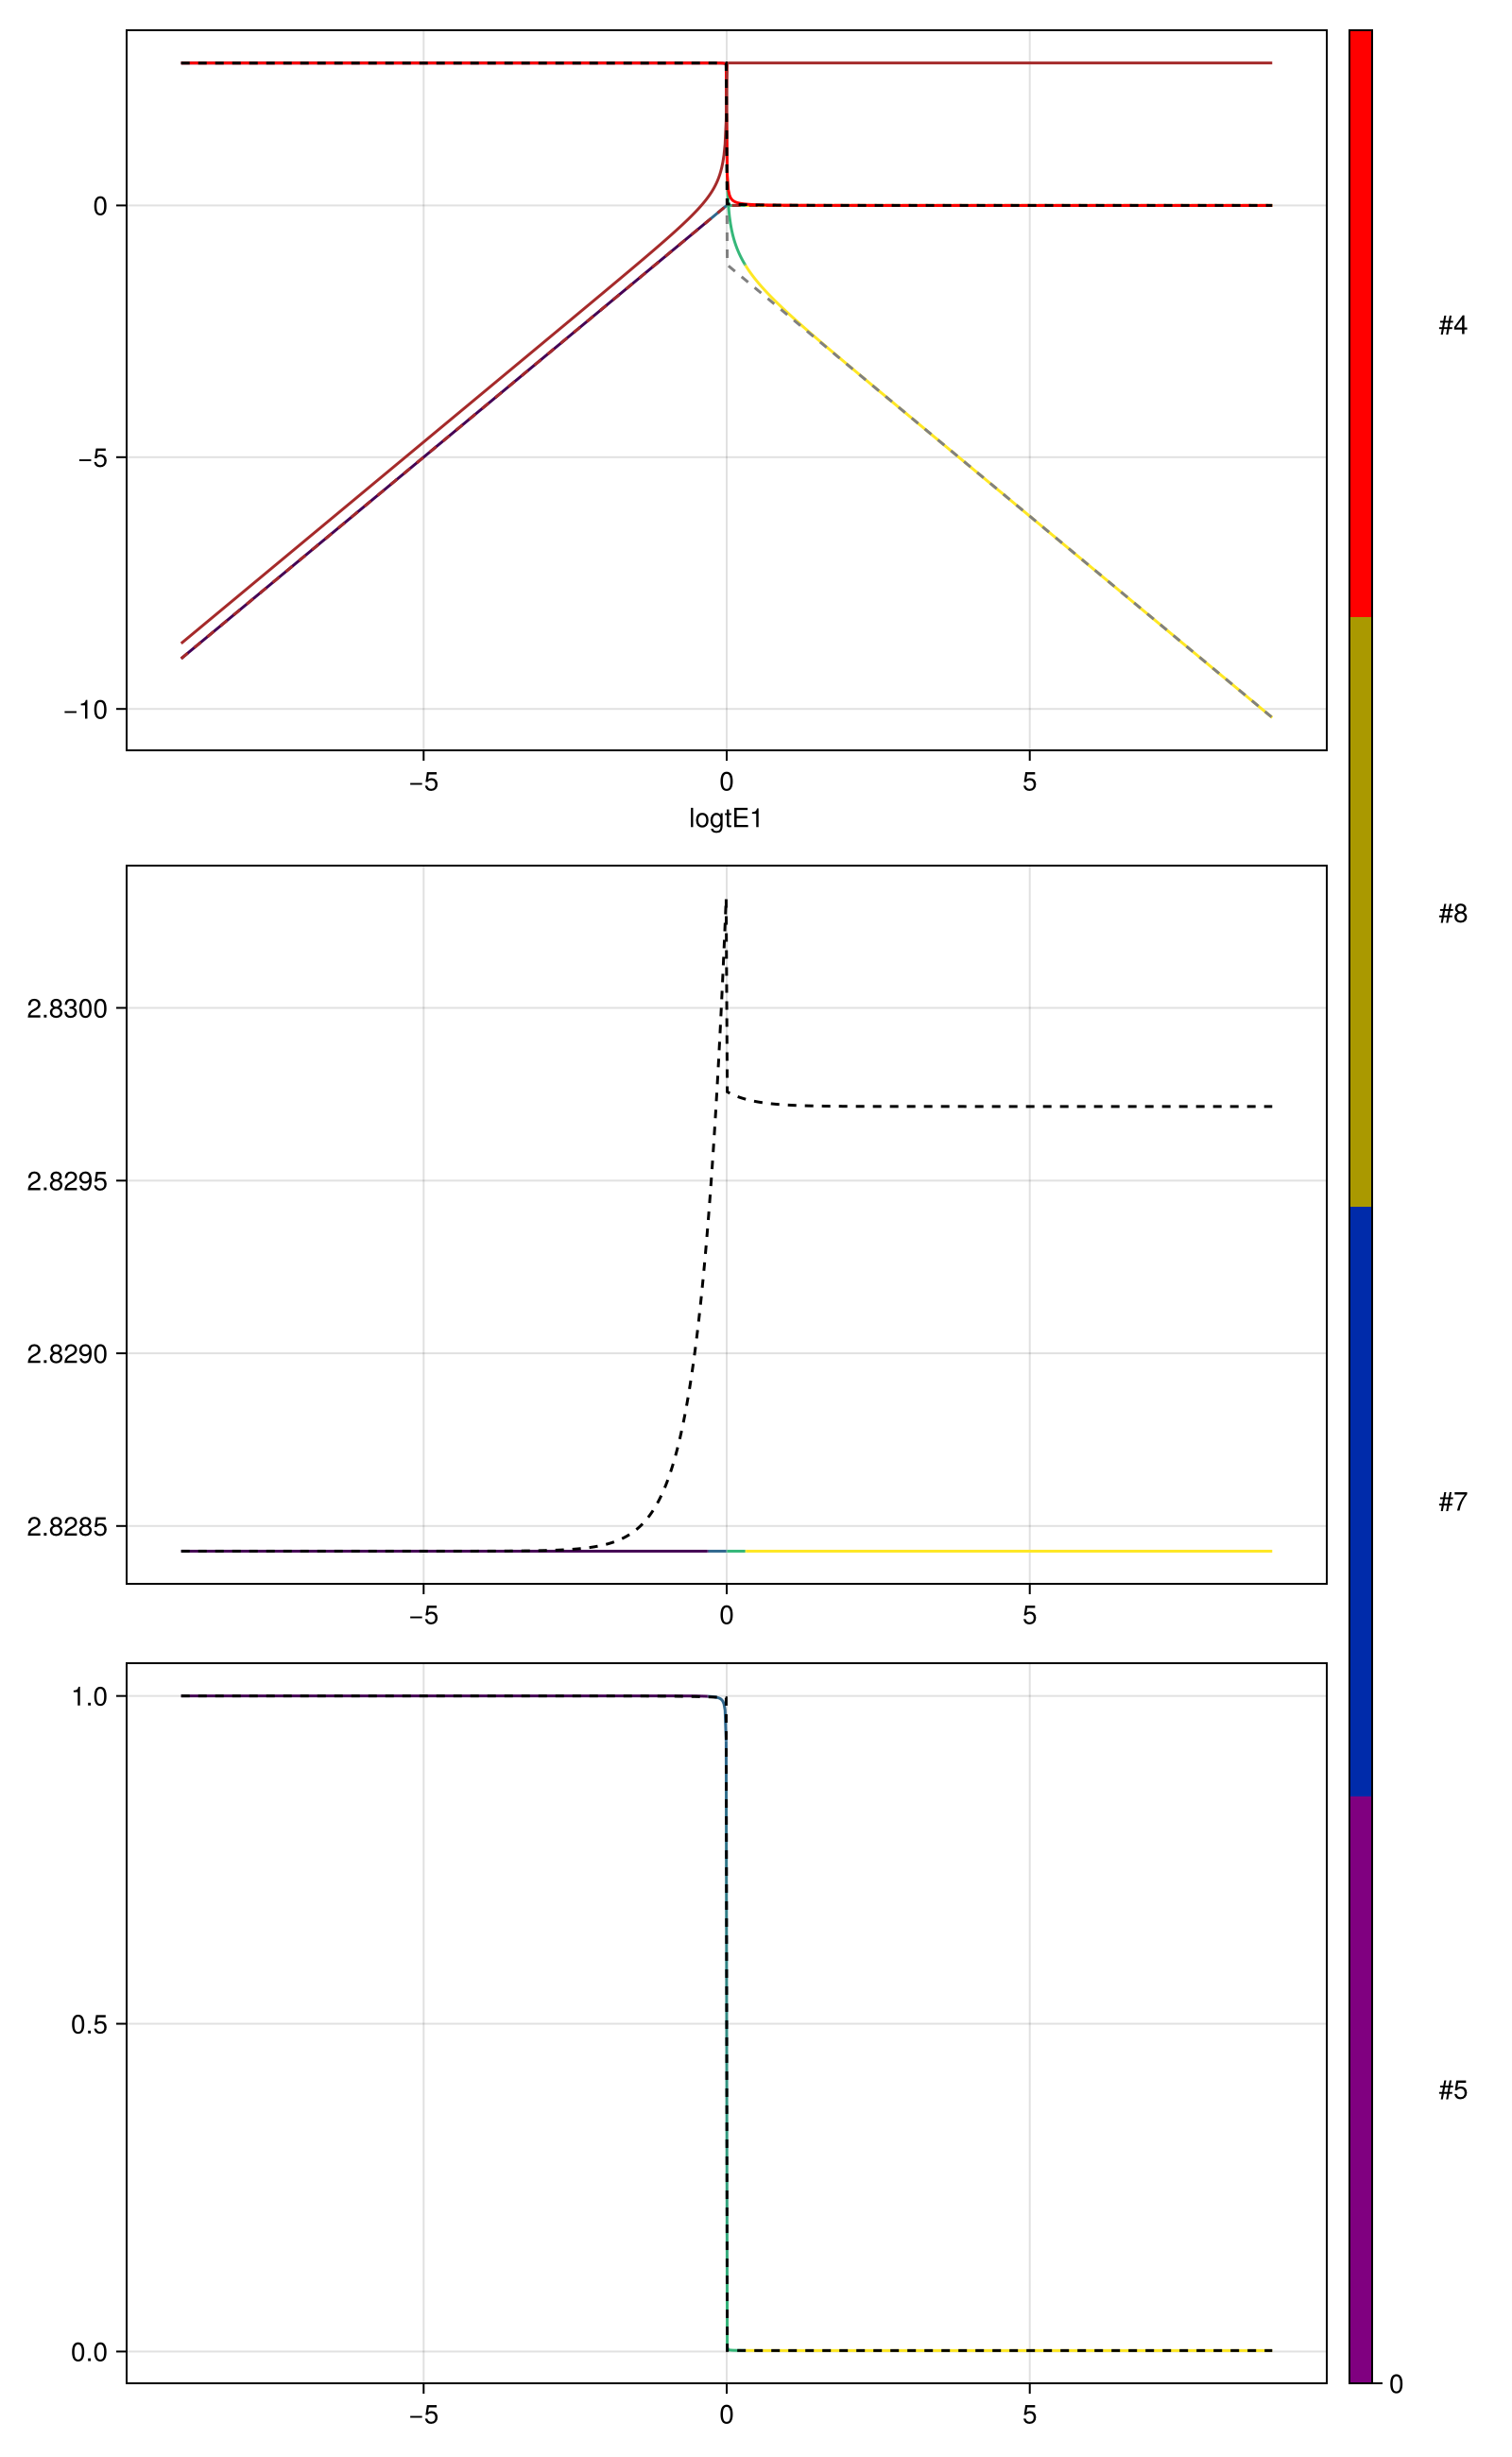

In [67]:
i=4
display(summary_path(grh)[i])
SISO_plot_manual(grh,i,start=-9,stop=9)

In [35]:
summary_path(grh)

8-element Vector{Tuple{Vector{Int64}, Vector{Float64}}}:
 ([1, 2, 6], [0.06481420510796107, 0.00031817549426185857])
 ([1, 5], [0.16863784114260996, 0.0008204911131896054])
 ([1, 9], [0.1618316238248644, 0.0008070464048137674])
 ([1, 13], [0.10412394338683541, 0.0005059198795578113])
 ([3, 4, 8, 6], [0.20856019925665548, 0.0010280045102241185])
 ([3, 7, 5], [0.10439751406475649, 0.0005065067108922749])
 ([3, 11, 9], [0.12442767522329073, 0.0006168144150447766])
 ([3, 15, 13], [0.06241111707486423, 0.0003060399961452202])

In [377]:
# ultrasensitive behaviors
sum(summary_path(grh)[[1,5,6,8]] .|> x->x[2][1] )

#got 44% change to be ultra sensitive

0.43983418018214426

In [396]:
show_expression_path(grh,3,1)

(SymbolicUtils.BasicSymbolic{Real}[tE1, tE1], SymbolicUtils.BasicSymbolic{Real}[K1])

In [59]:
show_expression_x(cmodel,13)

6-element Vector{Equation}:
 log10(E1) ~ log10(tE1)
 log10(E2) ~ log10(tE2)
 log10(W) ~ log10(tW) + log10(K1) - log10(k) - log10(tE1)
 log10(Ws) ~ log10(K2) + log10(tW) - log10(tE2)
 log10(C1) ~ log10(tW) - log10(k)
 log10(C2) ~ log10(tW)